In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('divvy_trip_data_202312.csv')

In [8]:
print(df.head())

            ride_id  rideable_type           started_at             ended_at  \
0  C9BD54F578F57246  electric_bike  2023-12-02 18:44:01  2023-12-02 18:47:51   
1  CDBD92F067FA620E  electric_bike  2023-12-02 18:48:19  2023-12-02 18:54:48   
2  ABC0858E52CBFC84  electric_bike  2023-12-24 01:56:32  2023-12-24 02:04:09   
3  F44B6F0E8F76DC90  electric_bike  2023-12-24 10:58:12  2023-12-24 11:03:04   
4  3C876413281A90DF  electric_bike  2023-12-24 12:43:16  2023-12-24 12:44:57   

  start_station_name start_station_id end_station_name end_station_id  \
0                NaN              NaN              NaN            NaN   
1                NaN              NaN              NaN            NaN   
2                NaN              NaN              NaN            NaN   
3                NaN              NaN              NaN            NaN   
4                NaN              NaN              NaN            NaN   

   start_lat  start_lng  end_lat  end_lng member_casual  
0      41.92     -87.6

In [10]:
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    35710
start_station_id      35710
end_station_name      37924
end_station_id        37924
start_lat                 0
start_lng                 0
end_lat                 239
end_lng                 239
member_casual             0
dtype: int64

In [14]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [16]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,224073.000000,224073.000000,223834.000000,223834.000000
mean,41.901721,-87.648399,41.901926,-87.648467
std,0.044201,0.026874,0.044248,0.026941
min,41.648501,-87.850000,41.648501,-87.960000
25%,41.880330,-87.661364,41.880419,-87.661364
50%,41.896617,-87.644448,41.896617,-87.644448
75%,41.930000,-87.630876,41.930000,-87.630876
max,42.070000,-87.528232,42.070000,-87.528232


In [20]:
# Convert date-time columns
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [26]:
# Compute ride duration in minutes
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [28]:
# Remove negative or zero durations
df = df[df['ride_duration'] > 0]

In [30]:
# Extract additional time-based features
df['day_of_week'] = df['started_at'].dt.day_name()
df['hour_of_day'] = df['started_at'].dt.hour
df['month'] = df['started_at'].dt.month_name()

In [32]:
# Set seaborn theme
sns.set_theme(style="whitegrid")

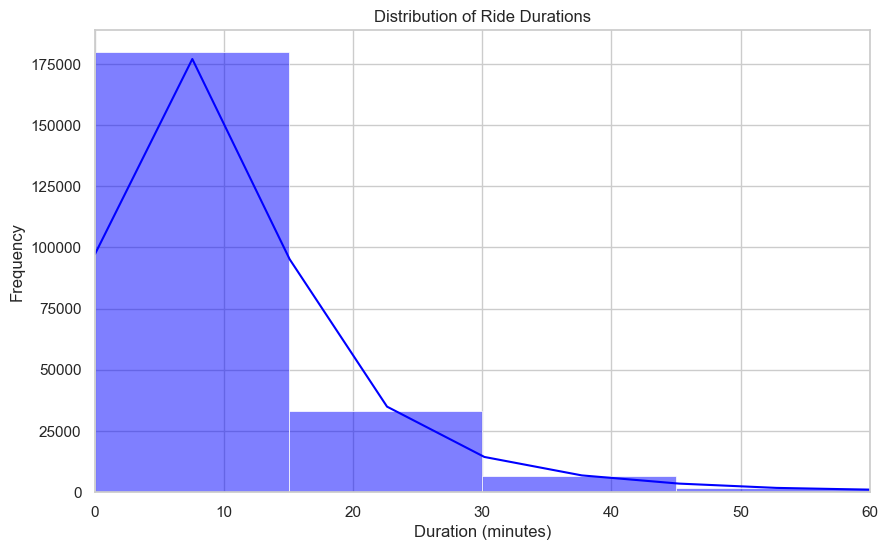

In [34]:
# 1. Ride Duration Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ride_duration'], bins=100, kde=True, color='blue')
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 60)  # Limit for better visualization
plt.show()

C:\Users\pp912\AppData\Local\Temp\ipykernel_31092\2505685989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


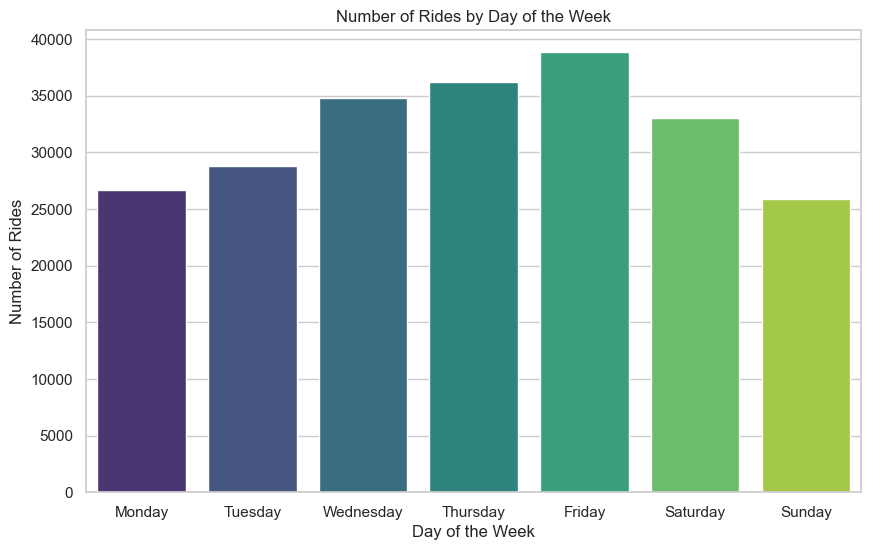

In [40]:
# 2. Number of Rides by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()


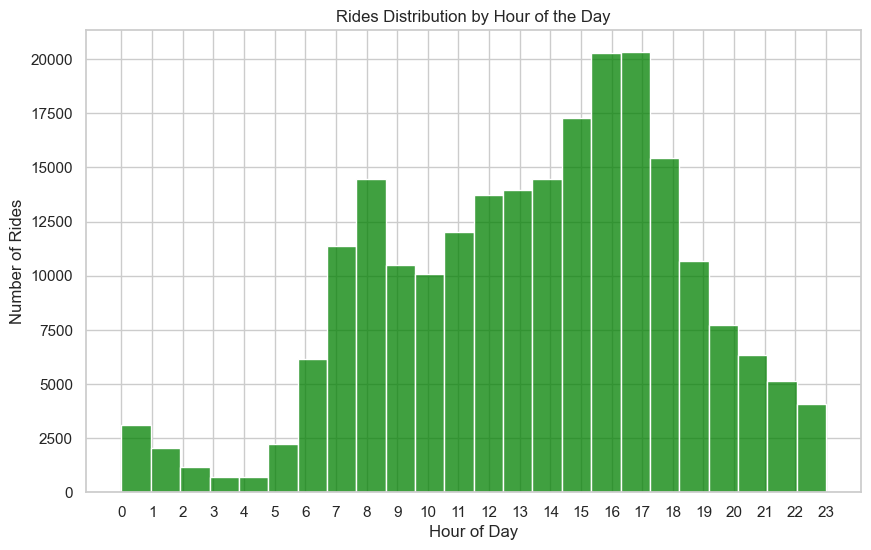

In [42]:
# 3. Ride Count by Hour of the Day
plt.figure(figsize=(10, 6))
sns.histplot(df['hour_of_day'], bins=24, kde=False, color='green')
plt.title('Rides Distribution by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.show()

C:\Users\pp912\AppData\Local\Temp\ipykernel_31092\1161530333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rideable_type', data=df, palette='coolwarm')


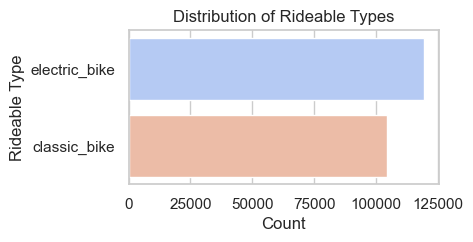

In [50]:
# 4. Rideable Type Usage
plt.figure(figsize=(4,2))
sns.countplot(y='rideable_type', data=df, palette='coolwarm')
plt.title('Distribution of Rideable Types')
plt.xlabel('Count')
plt.ylabel('Rideable Type')
plt.show()


C:\Users\pp912\AppData\Local\Temp\ipykernel_31092\178762240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='member_casual', data=df, palette='pastel')


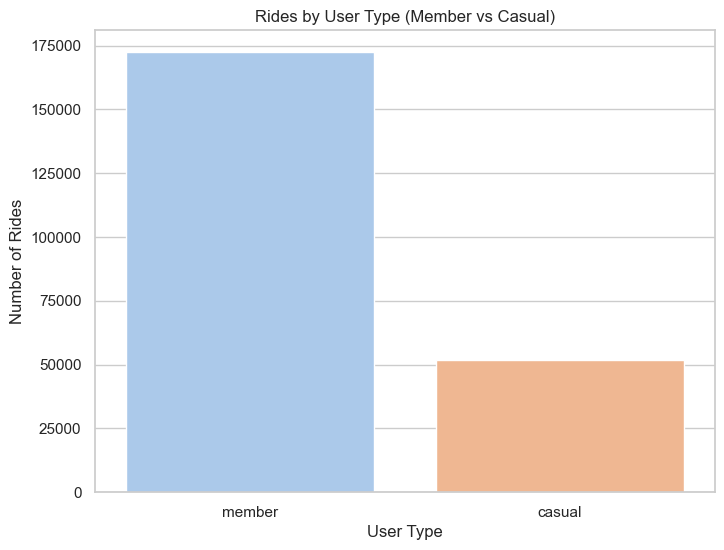

In [52]:
# 5. Member vs Casual Users
plt.figure(figsize=(8, 6))
sns.countplot(x='member_casual', data=df, palette='pastel')
plt.title('Rides by User Type (Member vs Casual)')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.show()

C:\Users\pp912\AppData\Local\Temp\ipykernel_31092\399784745.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='member_casual', y='ride_duration', data=df, palette='muted', estimator=np.mean, ci=None)
C:\Users\pp912\AppData\Local\Temp\ipykernel_31092\399784745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='member_casual', y='ride_duration', data=df, palette='muted', estimator=np.mean, ci=None)


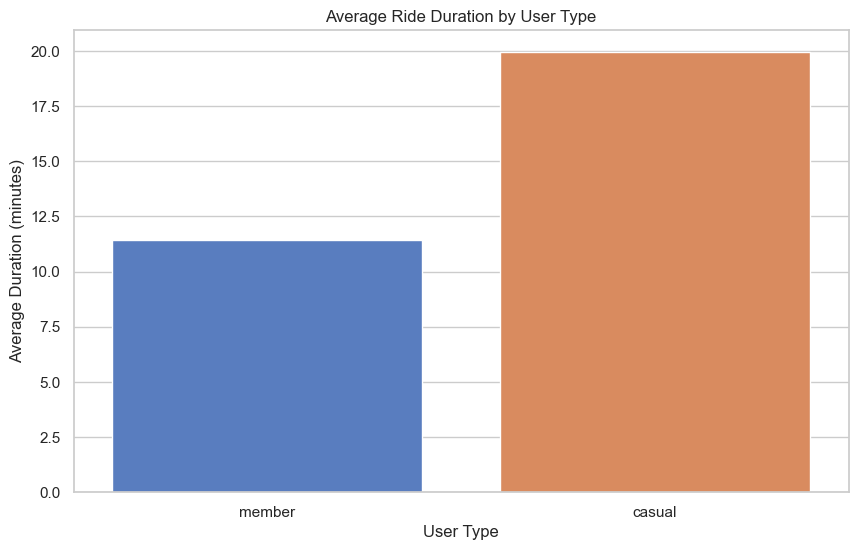

In [54]:
# 6. Average Ride Duration by User Type
plt.figure(figsize=(10, 6))
sns.barplot(x='member_casual', y='ride_duration', data=df, palette='muted', estimator=np.mean, ci=None)
plt.title('Average Ride Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Duration (minutes)')
plt.show()


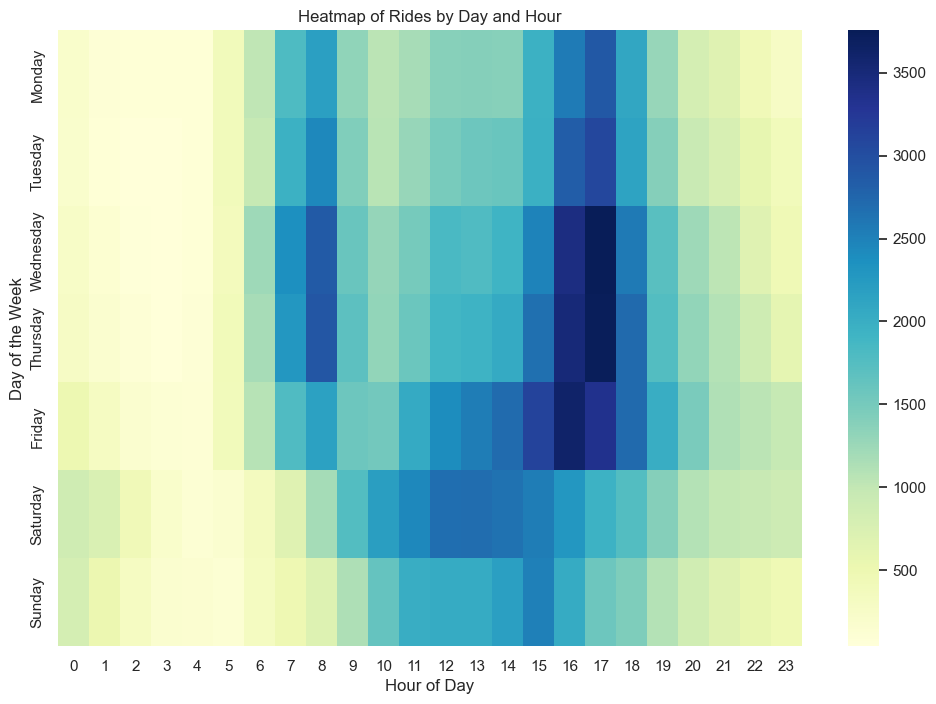

In [56]:
# 7. Heatmap of Rides by Day and Hour
rides_pivot = df.pivot_table(index='day_of_week', columns='hour_of_day', values='ride_id', aggfunc='count').reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(12, 8))
sns.heatmap(rides_pivot, cmap='YlGnBu', annot=False, cbar=True)
plt.title('Heatmap of Rides by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.show()